In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 
import six
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('ted_main_dummy_columns.csv')

Importing necessary libraries for Decision Tree.

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Creating features to use in decision tree.

In [5]:
rating_list = ['positive_ratings', 'negative_ratings', 'neutral_ratings']

In [52]:
attributes = ['duration', 'languages', 'num_speaker', 'Literature', 'Art' ,'Economy_Politics', 'Medicine',
             'Academy', 'Engineering_Science', 'Other_Occupations',
             'speaker_trend', 'tags_trend', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday',
              'funny_factor', 'TEDx', 'TED', 'TED_Global', 'TED_Other', 'Non_TED_University', 'Non_TED_Other']

Splitting dataset into test set and train set.

In [74]:
X = df[attributes].values
y = df['popularity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=100
                                                    ,stratify=y)

Creating Decision Tree classifier. And fitting our data in model.

In [75]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                             min_samples_split=5, min_samples_leaf=50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Features Importance
Seeing all important features used in the classifier.

In [29]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

duration 0.19375964434951584
languages 0.20390597144704845
num_speaker 0.002474234327731206
Literature 0.0
Art 0.021105921048532456
Economy_Politics 0.008077540042015562
Medicine 0.008374708298487125
Academy 0.005123779848433749
Engineering_Science 0.00395533024406108
Other_Occupations 0.007822787613846633
speaker_trend 0.13467989904505567
tags_trend 0.10438670283709922
Monday 0.036772567707550746
Tuesday 0.009122351240809692
Wednesday 0.002597779614881639
Thursday 0.012438346468387878
Friday 0.013655678310312759
Saturday 0.0
Sunday 0.0
funny_factor 0.1728540319200914
TEDx 0.011313742065791535
TED 0.02324900574566514
TED_Global 0.01052152409680736
TED_Other 0.013808453727874863
Non_TED_University 0.0
Non_TED_Other 0.0


#### Visualize the decision tree 

In [30]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [31]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Users/Pouria/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

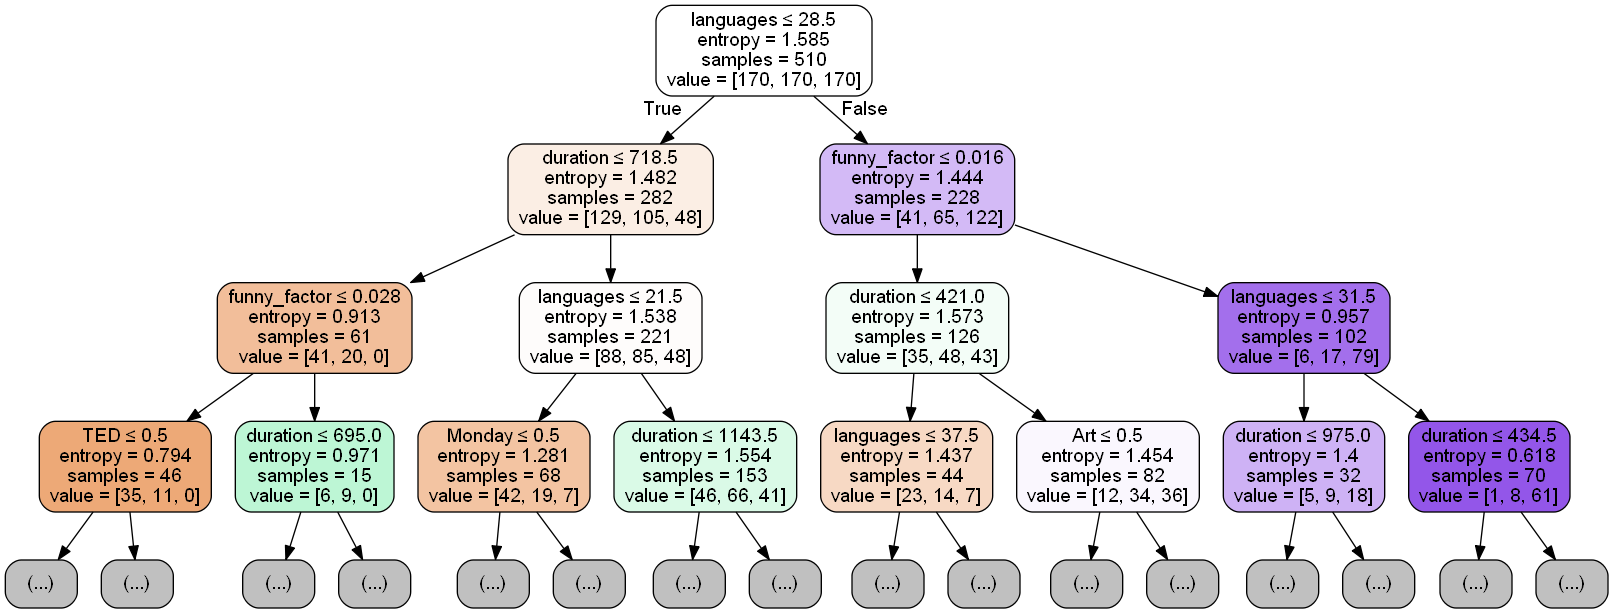

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes,   
                                filled=True, rounded=True,  
                                special_characters=True,max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Predicting train set using our model.

In [76]:
y_train_pred = clf.predict(X_train)

Showing different metrics for our train set.

In [77]:
print('Precision %s' % precision_score(y_train, y_train_pred, average='micro'))
print('Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('F1-score %s' % f1_score(y_train, y_train_pred, average='micro'))

Precision 0.5772549019607843
Accuracy 0.5772549019607843
F1-score 0.5772549019607843


In [35]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       170
           2       1.00      1.00      1.00       170

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



Predicting test set using our model.

In [36]:
y_test_pred = clf.predict(X_test)

Showing precision for our test set.

In [37]:
print('Precision %s' % precision_score(y_test, y_test_pred, average='micro'))

Precision 0.49950980392156863


### Tuning the hyper-parameters

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Creating a function for reporting the top models of Grid Search

In [39]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.9f} (std: {1:.9f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Defining different parameteres to be used in Grid Search.

In [55]:
param_list = {'criterion': ['gini','entropy'],
              'max_depth': [None] + list(np.arange(2, 6)),
              'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70],
              'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50, 60, 70]}

Using Grid Search to find out best models.

In [56]:
grid_search = GridSearchCV(clf, param_grid=param_list)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

C:\Users\Pouria\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [57]:
report(grid_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 5}

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 20}

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 30}

Model with rank: 1
Mean validation score: 0.557647059 (std: 0.012584874)
Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_l

Seeing the parameteres of the toppest model of Grid Search.

In [58]:
grid_search.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Cross Validation 

In [24]:
from sklearn.model_selection import cross_val_score

Using Cross Validation and seeing the precision for our test set.

In [78]:
precision_cross_scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='precision_micro')
print('Precision: %0.4f (+/- %0.2f)' % (precision_cross_scores.mean(), precision_cross_scores.std() * 2))

Precision: 0.5599 (+/- 0.09)
